In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Importing the necessary libraries and loading the dataset**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Load the dataset
df = pd.read_csv('rainfall_india.csv')
df.head()
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


**Filtering the data for Gujarat**

In [ ]:
# Filtering the data for Gujarat region
gujarat_data = df[df['SUBDIVISION'].str.contains('GUJARAT', case=False)]
gujarat_data.info()
gujarat_data.head()
gujarat_data.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 2277 to 2391
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  115 non-null    object 
 1   YEAR         115 non-null    int64  
 2   JAN          115 non-null    float64
 3   FEB          115 non-null    float64
 4   MAR          115 non-null    float64
 5   APR          115 non-null    float64
 6   MAY          115 non-null    float64
 7   JUN          115 non-null    float64
 8   JUL          115 non-null    float64
 9   AUG          115 non-null    float64
 10  SEP          115 non-null    float64
 11  OCT          115 non-null    float64
 12  NOV          115 non-null    float64
 13  DEC          115 non-null    float64
 14  ANNUAL       115 non-null    float64
 15  Jan-Feb      115 non-null    float64
 16  Mar-May      115 non-null    float64
 17  Jun-Sep      115 non-null    float64
 18  Oct-Dec      115 non-null    float64
dtypes: float6

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2387,GUJARAT REGION,2011,0.0,0.2,0.0,0.0,0.0,16.3,259.2,451.7,162.5,0.4,0.0,0.0,890.5,0.2,0.0,889.8,0.4
2388,GUJARAT REGION,2012,0.1,0.0,0.0,0.0,0.0,34.4,178.2,230.3,263.8,7.1,0.0,0.0,714.0,0.1,0.0,706.7,7.1
2389,GUJARAT REGION,2013,0.0,0.9,0.1,4.6,0.0,155.7,405.4,211.1,287.3,53.2,0.1,0.0,1118.6,0.9,4.7,1059.6,53.3
2390,GUJARAT REGION,2014,5.7,0.1,0.2,1.0,1.3,11.6,307.5,138.6,235.1,3.3,1.3,0.0,705.7,5.8,2.5,692.8,4.6
2391,GUJARAT REGION,2015,1.8,0.0,6.1,5.5,0.9,120.7,354.7,37.4,93.4,2.2,0.3,0.0,622.9,1.8,12.5,606.1,2.6


**Data cleaning**

In [ ]:
# Data Cleaning

# Checking for missing values
print("Missing Values Before Cleaning:\n", gujarat_data.isnull().sum())

# Dropping rows with missing values
gujarat_data.dropna(inplace=True)

# Alternatively, filling missing values with the mean or median of the column
#gujarat_data.fillna(gujarat_data.mean(), inplace=True)

# Checking for duplicates
print("\nNumber of Duplicates Before Cleaning:", gujarat_data.duplicated().sum())

# Dropping duplicates if any
gujarat_data.drop_duplicates(inplace=True)
print("Number of Duplicates After Cleaning:", gujarat_data.duplicated().sum())


Missing Values Before Cleaning:
 SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

Number of Duplicates Before Cleaning: 0
Number of Duplicates After Cleaning: 0


<ipython-input-7-9bfd99d1c040>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gujarat_data.dropna(inplace=True)
<ipython-input-7-9bfd99d1c040>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gujarat_data.drop_duplicates(inplace=True)


**EDA**

In [ ]:
# Exploratory Data Analysis (EDA)
print("\nDescriptive Statistics:\n", gujarat_data.describe())


Descriptive Statistics:
               YEAR         JAN         FEB         MAR         APR  \
count   115.000000  115.000000  115.000000  115.000000  115.000000   
mean   1958.000000    1.786087    1.191304    1.220870    1.116522   
std      33.341666    4.762590    2.870710    4.784102    3.980389   
min    1901.000000    0.000000    0.000000    0.000000    0.000000   
25%    1929.500000    0.000000    0.000000    0.000000    0.000000   
50%    1958.000000    0.100000    0.000000    0.000000    0.100000   
75%    1986.500000    1.500000    0.650000    0.250000    0.750000   
max    2015.000000   44.100000   14.600000   42.100000   40.400000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  115.000000  115.000000  115.000000  115.000000  115.000000  115.000000   
mean     5.809565  121.284348  348.920870  259.193043  148.841739   20.565217   
std     13.981353   84.287119  155.057669  139.006755  113.488112   34.580912   
min      0.000000  

**Visualizing the rainfall over the years**

<ipython-input-9-f6b7edea3440>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_states)  # 'tab20' colormap has 20 distinct colors


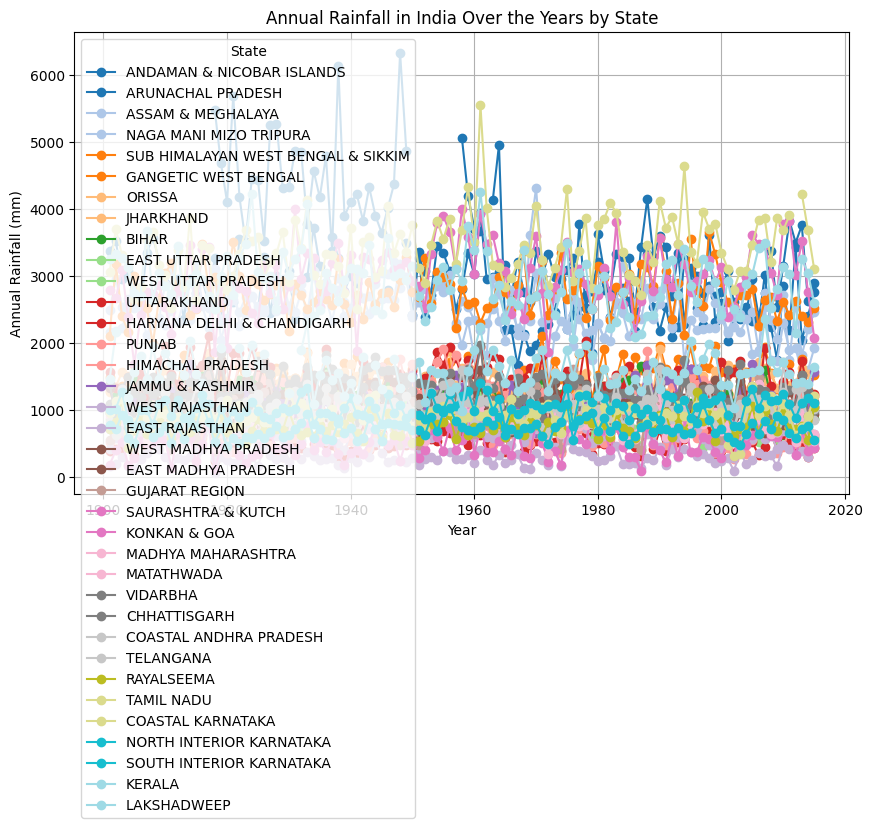

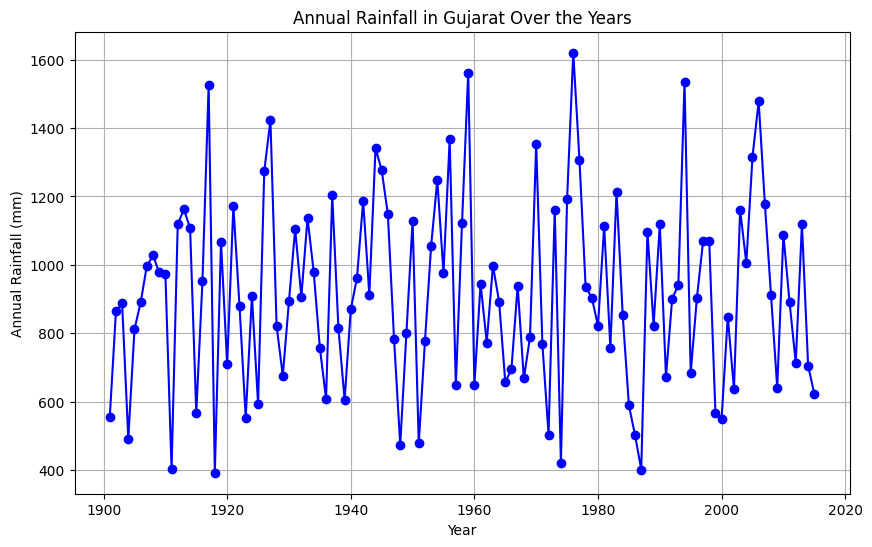

In [ ]:
# Visualizing rainfall over the years for different states
# Defining the number of unique states and creating a color map
states = df['SUBDIVISION'].unique()
num_states = len(states)
colors = plt.cm.get_cmap('tab20', num_states)  # 'tab20' colormap has 20 distinct colors

# Plotting each state's data with a different color
plt.figure(figsize=(10, 6))

for i, state in enumerate(states):
    state_data = df[df['SUBDIVISION'] == state]
    plt.plot(state_data['YEAR'], state_data['ANNUAL'], marker='o', color=colors(i), label=state)

plt.title('Annual Rainfall in India Over the Years by State')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend(title='State')
plt.grid(True)
plt.show()


# Visualizing rainfall over the years of Gujarat
plt.figure(figsize=(10, 6))
plt.plot(gujarat_data['YEAR'], gujarat_data['ANNUAL'], marker='o', color='b')
plt.title('Annual Rainfall in Gujarat Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.grid(True)
plt.show()

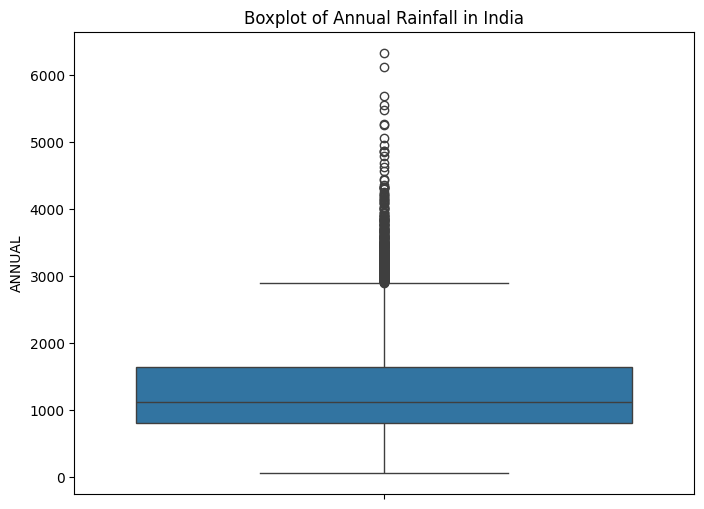

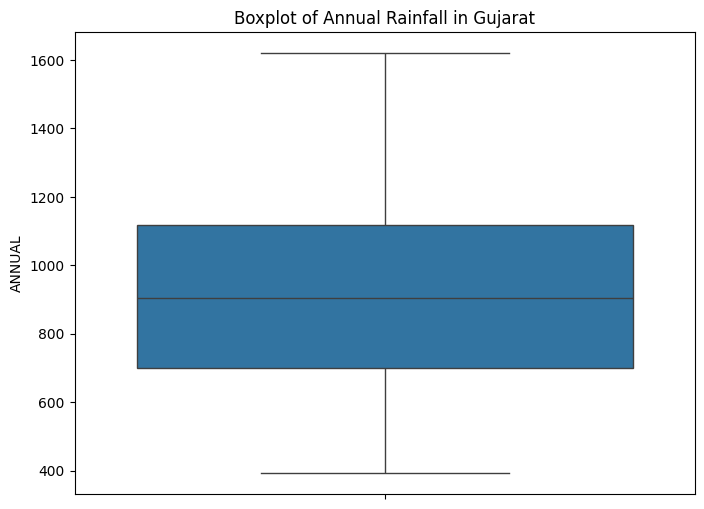

In [ ]:
# Boxplot to check for outliers in annual rainfall in India
plt.figure(figsize=(8, 6))
sns.boxplot(df['ANNUAL'])
plt.title('Boxplot of Annual Rainfall in India')
plt.show()


# Boxplot to check for outliers in annual rainfall in Gujarat
plt.figure(figsize=(8, 6))
sns.boxplot(gujarat_data['ANNUAL'])
plt.title('Boxplot of Annual Rainfall in Gujarat')
plt.show()

**Correlation Matrix**

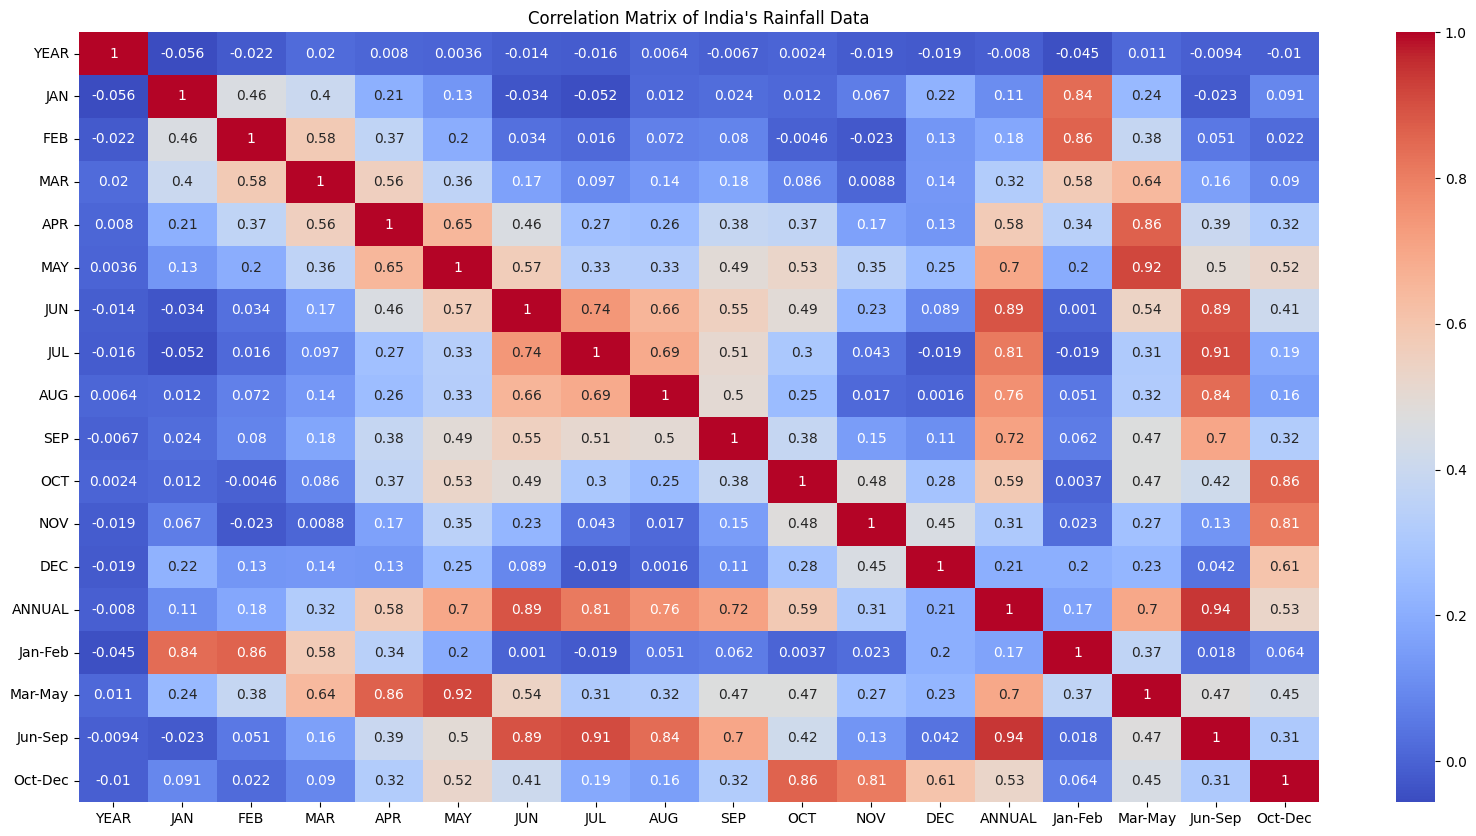

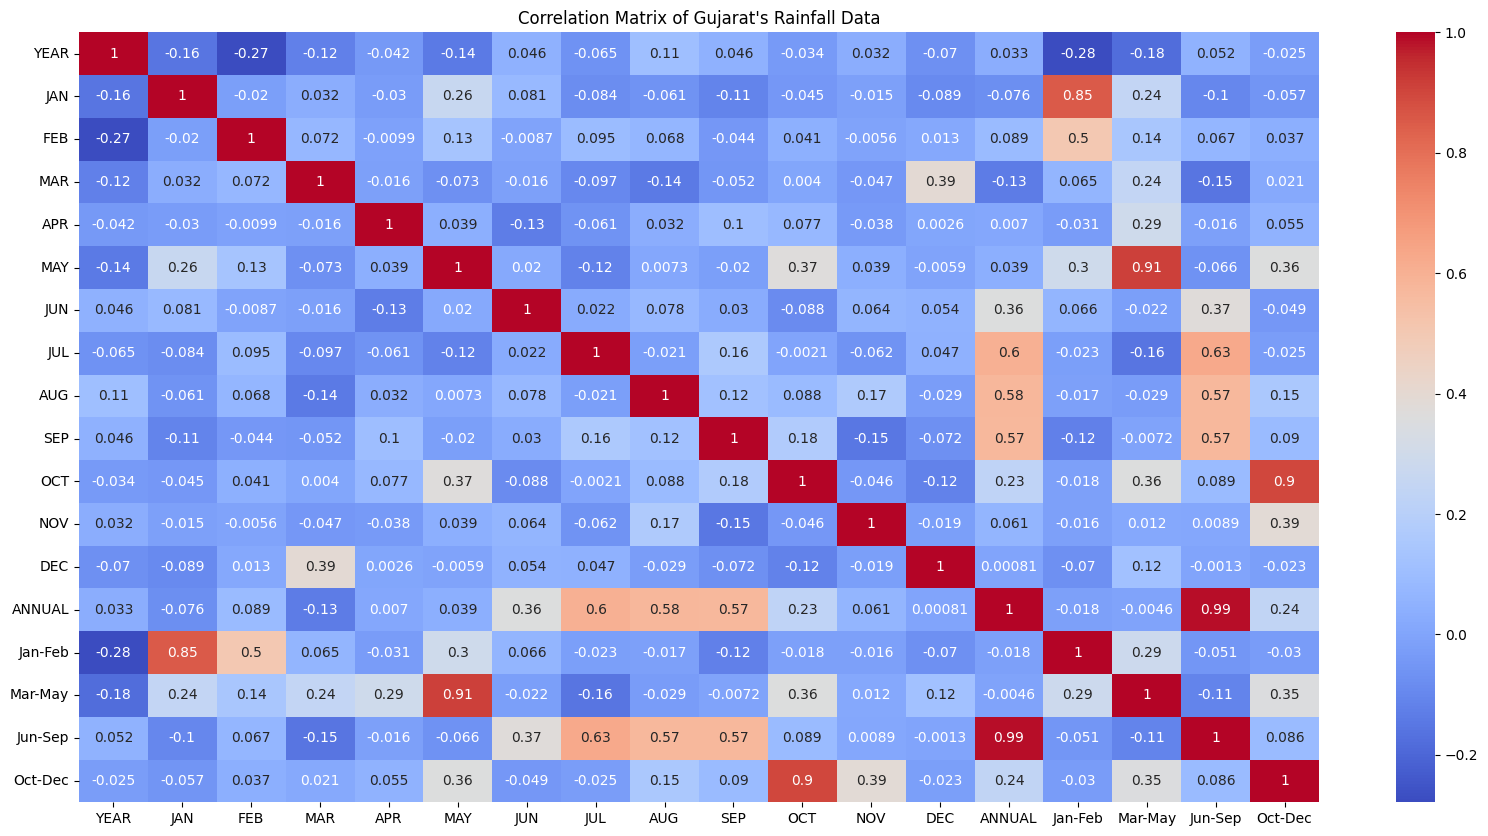

In [ ]:
#Correlation matrix for India
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of India's Rainfall Data")
plt.show()

#Correlation matrix for Gujarat
plt.figure(figsize=(20, 10))
sns.heatmap(gujarat_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Gujarat's Rainfall Data")
plt.show()

**Regression using LSTM**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Scale the data to the range [0, 1] to improve training stability for LSTMs
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Use a separate scaler for y
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

# Reshape data into 3D format [samples, time steps, features] for LSTM
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Build a more complex LSTM model with dropout
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer for regularization

# Second LSTM layer with Dropout
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer for final output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test data
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale using y_scaler
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test = y_scaler.inverse_transform(y_test)

# Evaluate the model using Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2144
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1803 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1496 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1212 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1063 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0743
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0606
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0606
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0632
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0583 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0591 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547  
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0567 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0553 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0564 
Epoch 16/100

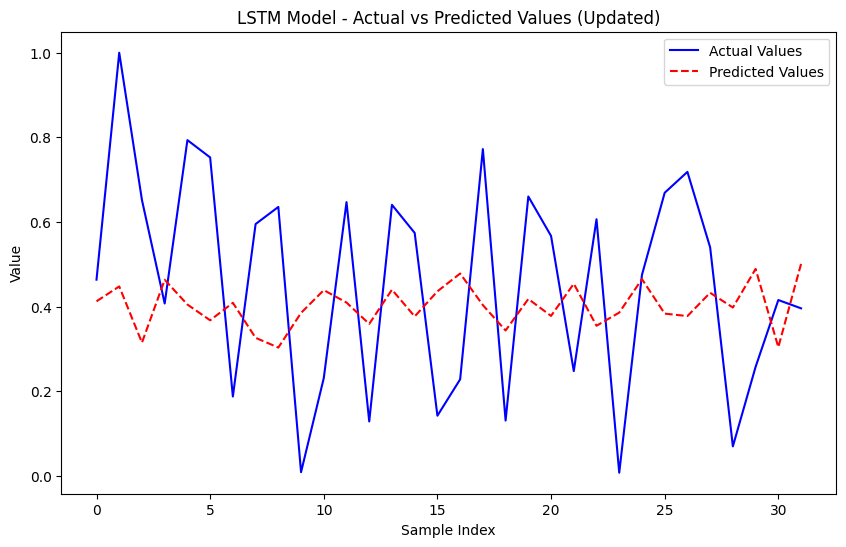

In [ ]:
#import matplotlib.pyplot as plt

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')

plt.title('LSTM Model - Actual vs Predicted Values (Updated)')
plt.xlabel('Sample Index')
plt.ylabel('Value')

plt.legend()
plt.show()



Conclusion

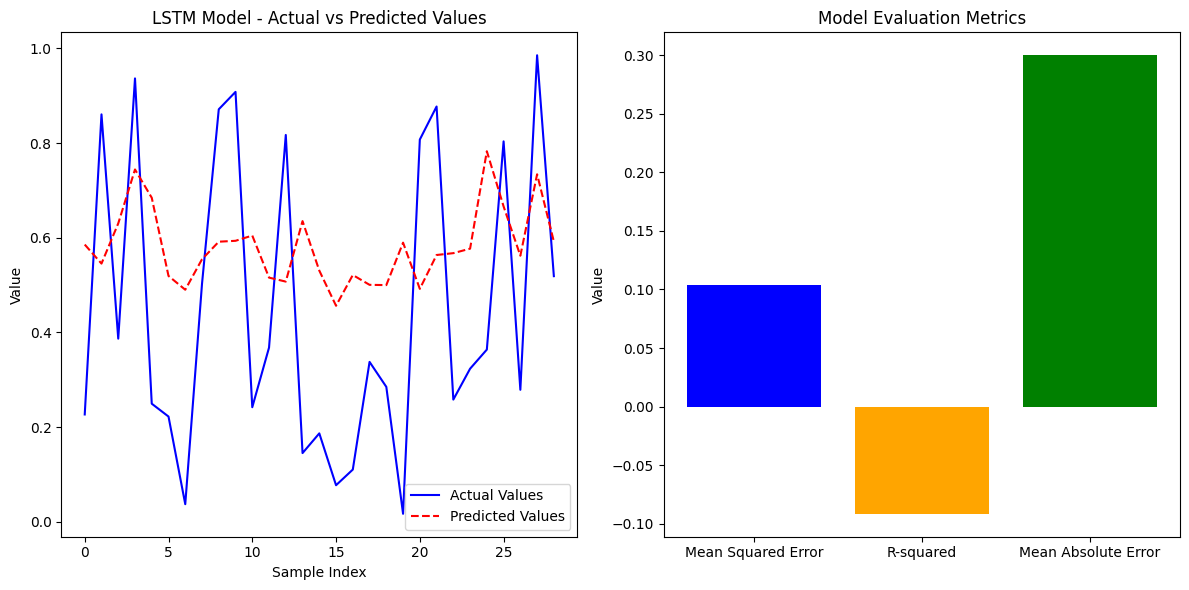

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(12, 6))

# Subplot for Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.title('LSTM Model - Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Subplot for evaluation metrics
plt.subplot(1, 2, 2)
metrics = [mse, r2, mae]
metrics_names = ['Mean Squared Error', 'R-squared', 'Mean Absolute Error']
plt.bar(metrics_names, metrics, color=['blue', 'orange', 'green'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


X_reshaped shape: (95, 5, 1)
y_reshaped shape: (95,)
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 462ms/step - loss: 0.3406 - val_loss: 0.4451
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2987 - val_loss: 0.3873
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2454 - val_loss: 0.3322
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2008 - val_loss: 0.2781
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1710 - val_loss: 0.2248
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1447 - val_loss: 0.1742
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1022 - val_loss: 0.1300
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0964 - val_loss: 0.0969
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0864 - val_loss: 0.0810
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0972 - val_loss: 0.0786
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1015 - val_loss: 0.0786
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1091 - val_loss: 0.0779


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

Model Evaluation Results:
Mean Squared Error (MSE): 0.10434173673407261
R-squared: -0.0965168053899983
Mean Absolute Error (MAE): 0.30013936920162704


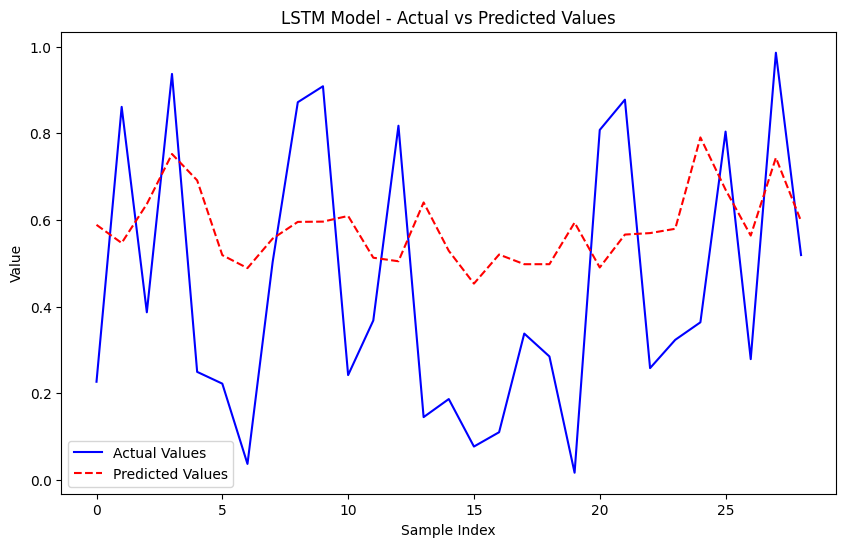

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf

# Assuming your input data is in X and output data in y
# Example input data (random for illustration)
n_samples = 100  # Change this to your actual sample size
n_features = 1   # Change this to the actual number of features

# Create sample data (replace this with your actual data)
np.random.seed(42)
X = np.random.rand(n_samples, n_features)  # Input data
y = np.random.rand(n_samples)  # Output data

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()  # Flatten to make it 1D

# Reshape data into 3D format (samples, time_steps, features)
time_steps = 5
X_reshaped = []
y_reshaped = []
for i in range(time_steps, len(X_scaled)):
    X_reshaped.append(X_scaled[i-time_steps:i])  # Take the previous 'time_steps' samples
    y_reshaped.append(y_scaled[i])

# Convert lists to NumPy arrays
X_reshaped = np.array(X_reshaped)  # Shape should be (n_samples - time_steps, time_steps, n_features)
y_reshaped = np.array(y_reshaped)   # Shape should be (n_samples - time_steps,)

# Check the shapes
print("X_reshaped shape:", X_reshaped.shape)  # Should be (samples, time_steps, features)
print("y_reshaped shape:", y_reshaped.shape)  # Should be (samples,)

# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.3, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions on the test data
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
y_scaler = scaler  # Assuming you want to use the same scaler for inverse transformation
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')

plt.title('LSTM Model - Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')

plt.legend()
plt.show()


Conclusion

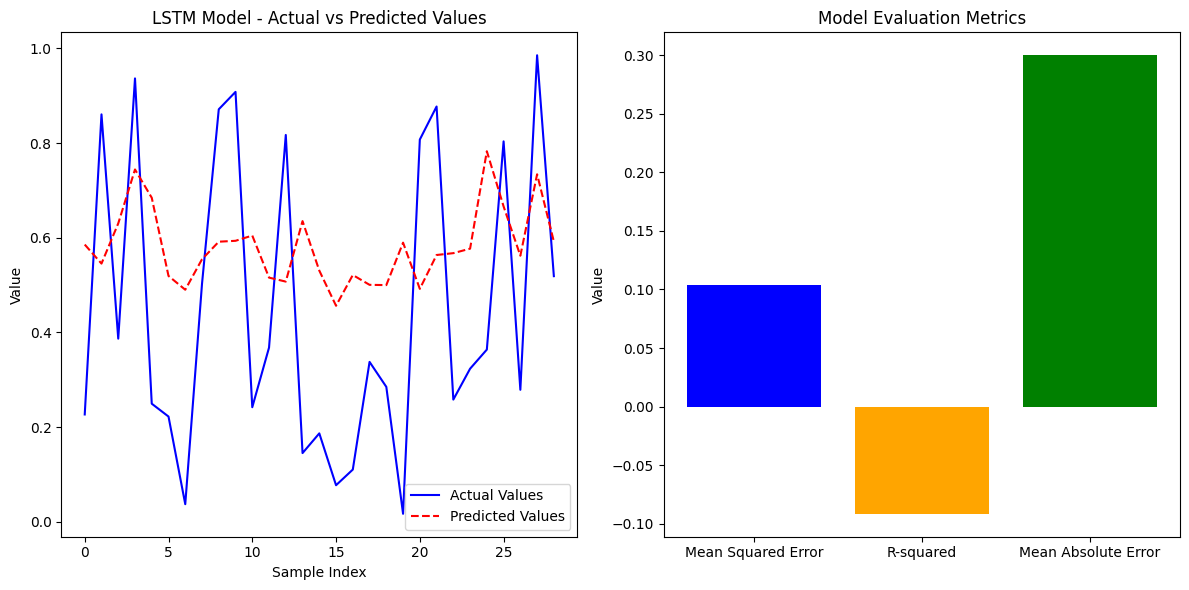

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(12, 6))

# Subplot for Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.title('LSTM Model - Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Subplot for evaluation metrics
plt.subplot(1, 2, 2)
metrics = [mse, r2, mae]
metrics_names = ['Mean Squared Error', 'R-squared', 'Mean Absolute Error']
plt.bar(metrics_names, metrics, color=['blue', 'orange', 'green'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 702ms/step - loss: 0.3482 - val_loss: 0.4615
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3006 - val_loss: 0.4090
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2744 - val_loss: 0.3583
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2392 - val_loss: 0.3084
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2058 - val_loss: 0.2587
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1591 - val_loss: 0.2094
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1219 - val_loss: 0.1623
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1097 - val_loss: 0.1210
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0901 - val_loss: 0.0924
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0880 - val_loss: 0.0796
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0997 - val_loss: 0.0777
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1075 - val_loss: 0.0775


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step

Model Evaluation Results:
Mean Squared Error (MSE): 0.10386044689788251
R-squared: -0.09145897896153032
Mean Absolute Error (MAE): 0.2998640265727534


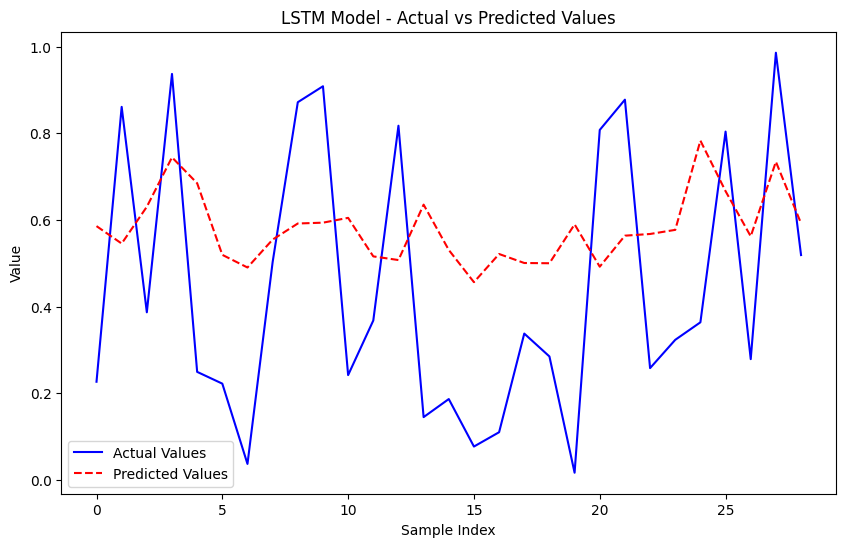

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

# Sample input data (replace this with your actual dataset)
n_samples = 100
n_features = 1

# Create sample data (replace this with your actual data)
np.random.seed(42)
X = np.random.rand(n_samples, n_features)
y = np.random.rand(n_samples)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Reshape data into 3D format (samples, time_steps, features)
time_steps = 5
X_reshaped = []
y_reshaped = []
for i in range(time_steps, len(X_scaled)):
    X_reshaped.append(X_scaled[i-time_steps:i])
    y_reshaped.append(y_scaled[i])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)

# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.3, random_state=42)

# Build the LSTM model with additional dropout layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Adding dropout to reduce overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Adding another dropout layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions on the test data
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
y_scaler = scaler
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')

plt.title('LSTM Model - Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()


Conclusion

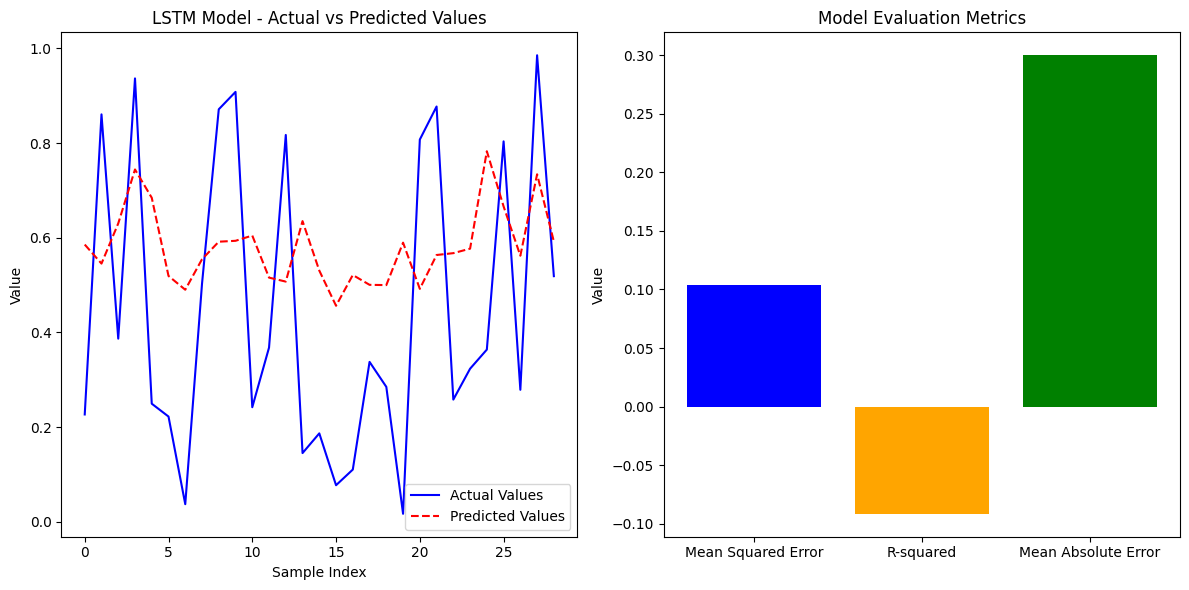

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(12, 6))

# Subplot for Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.title('LSTM Model - Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Subplot for evaluation metrics
plt.subplot(1, 2, 2)
metrics = [mse, r2, mae]
metrics_names = ['Mean Squared Error', 'R-squared', 'Mean Absolute Error']
plt.bar(metrics_names, metrics, color=['blue', 'orange', 'green'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


**Average Rainfall within 10 Years, 15 Years and 20 Years**

<ipython-input-16-b3a316054286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gujarat_data['DECADE'] = (gujarat_data['YEAR'] // 10) * 10
<ipython-input-16-b3a316054286>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DECADE', y='ANNUAL', data=decadal_rainfall, palette='viridis')


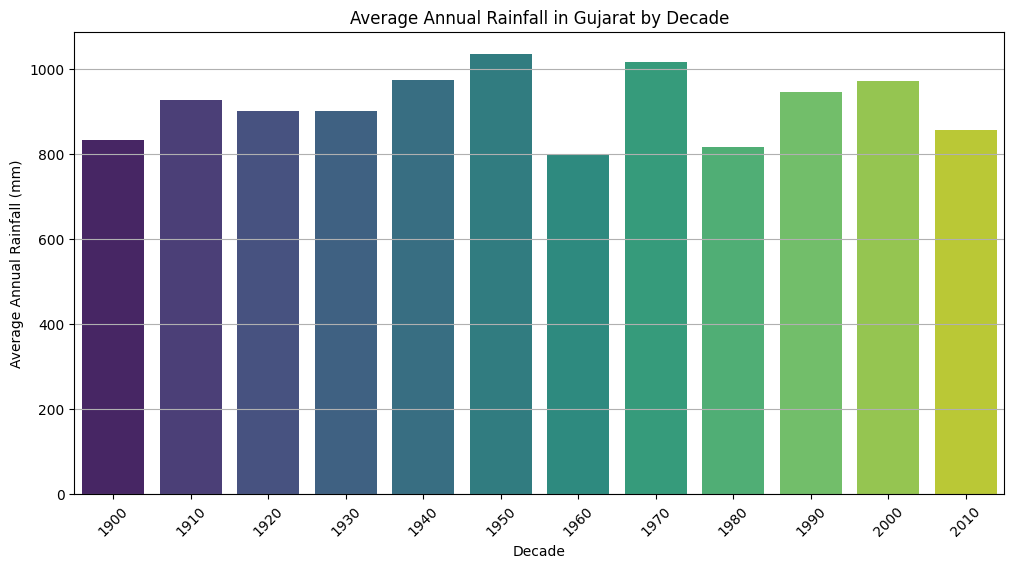

In [ ]:
# Creating a 'Decade' column
gujarat_data['DECADE'] = (gujarat_data['YEAR'] // 10) * 10

# Grouping by decade and calculate average annual rainfall
decadal_rainfall = gujarat_data.groupby('DECADE')['ANNUAL'].mean().reset_index()

# Visualizing the average rainfall by decade
plt.figure(figsize=(12, 6))
sns.barplot(x='DECADE', y='ANNUAL', data=decadal_rainfall, palette='viridis')
plt.title('Average Annual Rainfall in Gujarat by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Annual Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-17-bbedf0cbe826>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gujarat_data['DECADE AND A HALF'] = (gujarat_data['YEAR'] // 15) * 15
<ipython-input-17-bbedf0cbe826>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DECADE AND A HALF', y='ANNUAL', data=decadal_rainfall, palette='viridis')


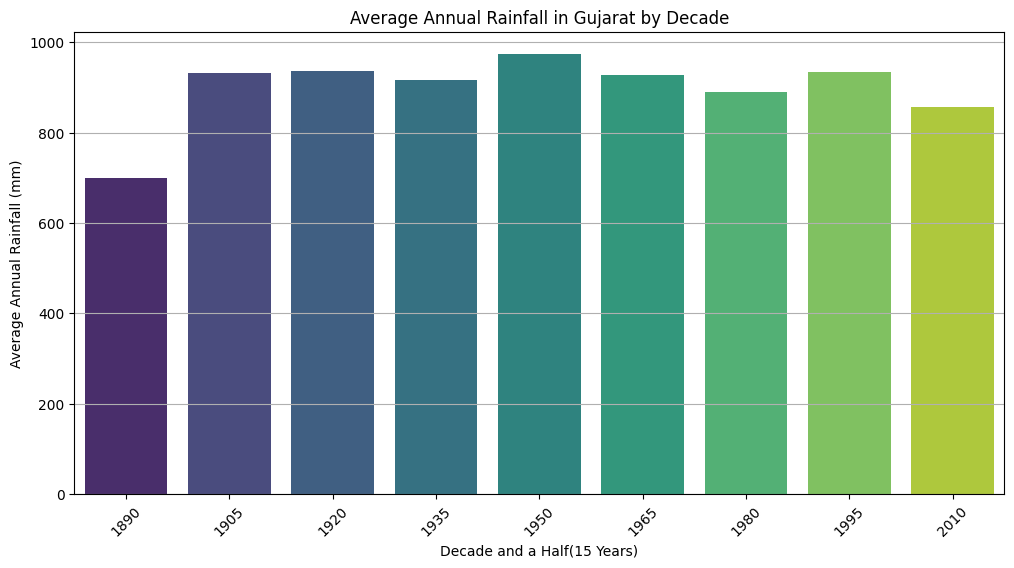

In [ ]:
# Creating a 'Decade AND A HALF' column
gujarat_data['DECADE AND A HALF'] = (gujarat_data['YEAR'] // 15) * 15

# Grouping by decade and calculate average annual rainfall
decadal_rainfall = gujarat_data.groupby('DECADE AND A HALF')['ANNUAL'].mean().reset_index()

# Visualizing the average rainfall by decade and a half
plt.figure(figsize=(12, 6))
sns.barplot(x='DECADE AND A HALF', y='ANNUAL', data=decadal_rainfall, palette='viridis')
plt.title('Average Annual Rainfall in Gujarat by Decade')
plt.xlabel('Decade and a Half(15 Years)')
plt.ylabel('Average Annual Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-18-a27ff4f247ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gujarat_data['VICENNIUM(20 YEARS)'] = (gujarat_data['YEAR'] // 20) * 20
<ipython-input-18-a27ff4f247ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VICENNIUM(20 YEARS)', y='ANNUAL', data=decadal_rainfall, palette='viridis')


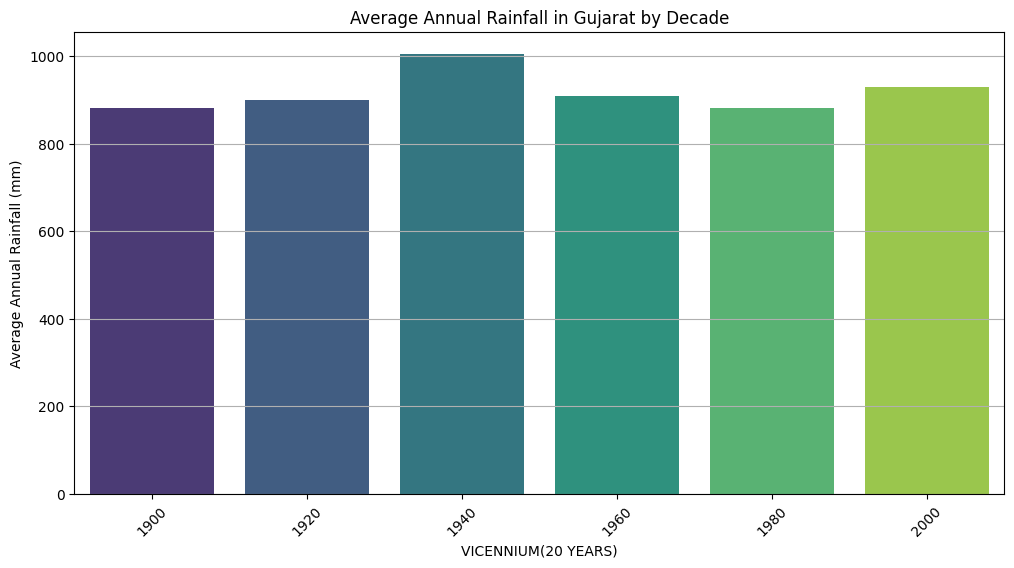

In [ ]:
# Creating a 'VICENNIUM(20 YEARS)' column
gujarat_data['VICENNIUM(20 YEARS)'] = (gujarat_data['YEAR'] // 20) * 20

# Grouping by decade and calculate average annual rainfall
decadal_rainfall = gujarat_data.groupby('VICENNIUM(20 YEARS)')['ANNUAL'].mean().reset_index()

# Visualizing the average rainfall by decade and a half
plt.figure(figsize=(12, 6))
sns.barplot(x='VICENNIUM(20 YEARS)', y='ANNUAL', data=decadal_rainfall, palette='viridis')
plt.title('Average Annual Rainfall in Gujarat by Decade')
plt.xlabel('VICENNIUM(20 YEARS)')
plt.ylabel('Average Annual Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Conclusion**

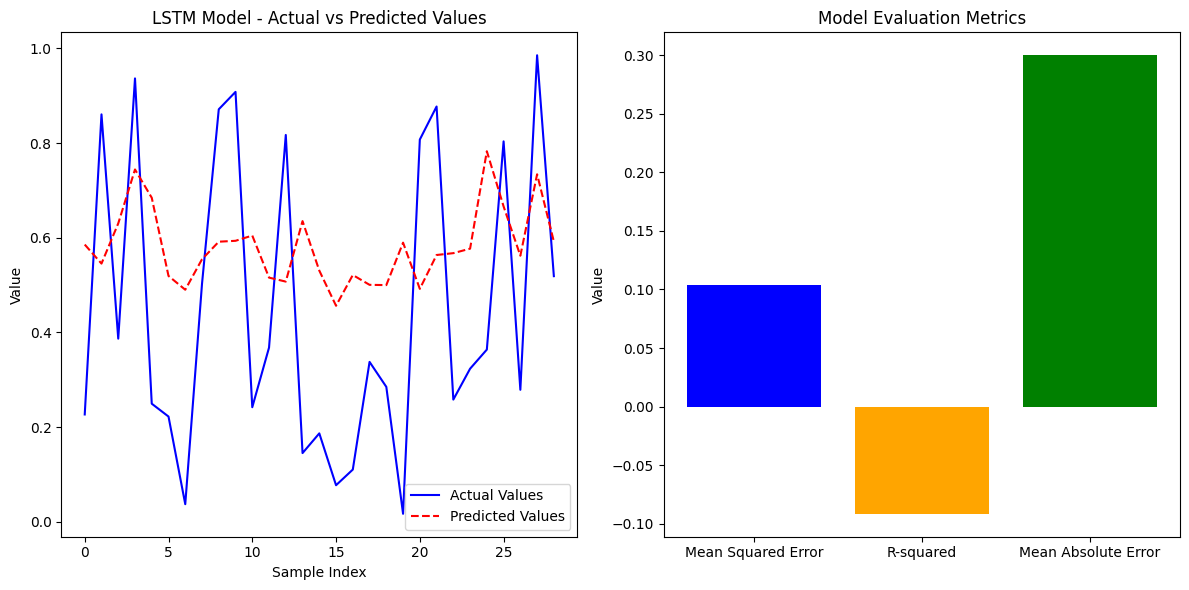

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(12, 6))

# Subplot for Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.title('LSTM Model - Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Subplot for evaluation metrics
plt.subplot(1, 2, 2)
metrics = [mse, r2, mae]
metrics_names = ['Mean Squared Error', 'R-squared', 'Mean Absolute Error']
plt.bar(metrics_names, metrics, color=['blue', 'orange', 'green'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
